### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_trks = pd.read_csv('https://api.vitaldb.net/trks')
df_cases = pd.read_csv("https://api.vitaldb.net/cases")
df_labs = pd.read_csv('https://api.vitaldb.net/labs')

* df_trks chech

In [3]:
df_trks.head()

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0


* If df_trks['tname'] == 'SNUADC/PLETH'

In [4]:
df_trks['tname'].unique() 

array(['BIS/BIS', 'BIS/EEG1_WAV', 'BIS/EEG2_WAV', 'BIS/EMG', 'BIS/SEF',
       'BIS/SQI', 'BIS/SR', 'BIS/TOTPOW', 'Primus/AWP', 'Primus/CO2',
       'Primus/COMPLIANCE', 'Primus/ETCO2', 'Primus/EXP_DES',
       'Primus/EXP_SEVO', 'Primus/FEN2O', 'Primus/FEO2', 'Primus/FIN2O',
       'Primus/FIO2', 'Primus/INCO2', 'Primus/INSP_DES',
       'Primus/INSP_SEVO', 'Primus/MAC', 'Primus/MAWP_MBAR', 'Primus/MV',
       'Primus/PAMB_MBAR', 'Primus/PEEP_MBAR', 'Primus/PIP_MBAR',
       'Primus/PPLAT_MBAR', 'Primus/RR_CO2', 'Primus/SET_AGE',
       'Primus/SET_FIO2', 'Primus/SET_FRESH_FLOW',
       'Primus/SET_INSP_PAUSE', 'Primus/SET_INSP_TM',
       'Primus/SET_INTER_PEEP', 'Primus/SET_PIP', 'Primus/SET_RR_IPPV',
       'Primus/SET_TV_L', 'Primus/TV', 'Primus/VENT_LEAK', 'SNUADC/ART',
       'SNUADC/ECG_II', 'SNUADC/ECG_V5', 'SNUADC/PLETH',
       'Solar8000/ART_DBP', 'Solar8000/ART_MBP', 'Solar8000/ART_SBP',
       'Solar8000/BT', 'Solar8000/ETCO2', 'Solar8000/FEO2',
       'Solar8000/FIO2', '

In [5]:
df_trks_id = set(df_trks[df_trks['tname'] == 'SNUADC/PLETH']['caseid'])

In [6]:
len(df_trks_id)

6157

In [7]:
len(set(df_trks_id))

6157

In [8]:
df_cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [9]:
len(df_cases.columns)

74

* Only SNUADC/PLETH id

In [10]:
df_ica = df_cases[df_cases['caseid'].map(lambda x: x in df_trks_id)]

In [11]:
df_ica

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


* ica : label(up, norm, down)

In [12]:
lab_ica_id = list(set(df_labs[df_labs['name'] == 'ica']['caseid']))

In [13]:
df_labs_ica = df_ica[df_ica['caseid'].map(lambda x: x in lab_ica_id)]

In [14]:
df_labs_ica

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
6,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0,0.0,0,120,0,0,0,0,0
9,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,0,90,0.0,0,110,0,20,500,0,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,6383,4255,0,23242,-1883,23137.0,3037,22641,-224040,812760,...,35,0,0.0,0,80,0,10,0,0,300
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [15]:
def anocut(x):
  if 1.1 <= x <= 1.3:
    output = 0
  elif x > 1.3:
    output = 1
  else:
    output = -1
  return output

In [16]:
df_labs['label'] = df_labs[df_labs['name'] == 'ica']['result'].map(lambda x : anocut(x))

In [17]:
df_labs = df_labs.dropna()

In [18]:
df_labs

,caseid,dt,name,result,label
55,1,3060,ica,1.03,-1.0
56,1,8921,ica,1.04,-1.0
57,1,4628,ica,1.08,-1.0
346,4,28903,ica,1.13,0.0
347,4,19934,ica,1.15,0.0
...,...,...,...,...,...
928275,6386,3549,ica,1.18,0.0
928276,6386,12554,ica,1.18,0.0
928359,6387,1905,ica,1.10,0.0
928422,6388,6649,ica,1.03,-1.0


* drop_duplicates

In [19]:
id_lb = df_labs[['caseid', 'dt', 'label']]

In [20]:
id_lb

,caseid,dt,label
55,1,3060,-1.0
56,1,8921,-1.0
57,1,4628,-1.0
346,4,28903,0.0
347,4,19934,0.0
...,...,...,...
928275,6386,3549,0.0
928276,6386,12554,0.0
928359,6387,1905,0.0
928422,6388,6649,-1.0


In [21]:
max(id_lb['dt'])

7691795

In [22]:
min(abs(id_lb['dt']))

70

In [23]:
abs(id_lb['dt']).sort_values()[:10]

665799     70
606072    147
743665    254
278285    288
890222    294
566284    381
540023    432
446681    437
525810    460
897752    466
Name: dt, dtype: int64

* remove dt < 300 

In [24]:
caseid, dt, label = id_lb.iloc[1]

In [25]:
id_lb_1000 = id_lb[:1000]

In [26]:
abs(id_lb_1000['dt']).sort_values()[:10]

51422    647
31364    728
25970    821
42199    825
50005    835
24811    844
2757     908
25492    924
8718     936
45355    978
Name: dt, dtype: int64

In [27]:
import vitaldb

In [28]:
dt_list = []
dt_signal_5 = []
dt_signal_3 = []
dt_signal_1 = []
lb_list = []
for idx in range(len(id_lb_1000)):
    caseid, dt, label = id_lb_1000.iloc[idx]
    vals = vitaldb.load_case(caseid, ['SNUADC/PLETH'], 1/60).flatten() # scale : dt <-> vals
    if dt < len(vals) and dt > 300: 
        dt_list.append(dt)
        dt_signal_5.append(vals[int(dt)-300:int(dt)]) # sequence range
        dt_signal_3.append(vals[int(dt)-180:int(dt)]) # sequence range
        dt_signal_1.append(vals[int(dt)-60:int(dt)]) # sequence range
        lb_list.append(label)
    else:
        pass

In [32]:
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd

import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# 평가 지표로 활용하기 위해서.
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [34]:
data = list(dt_signal_5)

In [35]:
label = list(lb_list)

In [36]:
label

[-1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [37]:
df = pd.DataFrame(data)

In [38]:
df['label'] = label

In [39]:
df

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,23.334999,23.334999,24.124901,25.704901,28.864700,31.234600,35.579399,39.924198,39.924198,40.319199,...,50.193802,52.563702,55.328602,57.303501,58.488400,58.488400,58.488400,57.698502,56.513500,-1.0
1,53.353699,51.378700,48.218899,45.058998,42.689098,40.714199,37.949299,36.369400,34.394501,33.209499,...,28.864700,26.889799,26.099800,24.914900,24.124901,22.940001,22.150000,21.360001,20.965099,-1.0
2,24.519899,24.519899,24.914900,25.309900,28.469700,31.234600,35.184399,39.134300,43.874100,48.218899,...,23.334999,23.334999,22.940001,23.729900,24.914900,28.074800,31.234600,35.184399,39.529301,-1.0
3,41.504200,39.924198,38.739300,37.554298,36.764400,35.579399,34.789501,33.209499,32.024601,30.839600,...,27.284800,26.889799,26.494801,26.494801,26.099800,26.099800,26.494801,26.099800,26.889799,0.0
4,23.334999,23.729900,24.124901,24.519899,26.889799,30.049700,34.789501,40.319199,46.638901,52.958698,...,25.309900,25.309900,24.914900,24.519899,24.519899,24.124901,24.124901,24.519899,24.914900,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,37.159401,37.554298,37.554298,37.949299,38.739300,39.134300,39.529301,39.924198,39.924198,39.529301,...,39.529301,38.739300,38.344299,37.949299,37.554298,37.159401,37.159401,37.159401,37.554298,-1.0
656,37.554298,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,36.764400,36.764400,...,37.159401,37.159401,36.764400,37.159401,37.159401,37.554298,37.949299,38.739300,39.924198,-1.0
657,37.554298,37.554298,37.554298,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,...,37.554298,37.554298,37.554298,37.554298,37.949299,38.344299,37.949299,37.949299,37.554298,-1.0
658,37.159401,37.159401,37.159401,36.764400,36.764400,36.764400,36.764400,37.159401,37.159401,37.554298,...,36.369400,36.764400,37.159401,37.554298,37.949299,38.344299,39.134300,39.134300,39.134300,0.0


In [40]:
df_norm = df[df['label']==0]

In [41]:
df_ano = df[df['label']!=0]

In [42]:
raw_data_norm = df_norm.values

In [43]:
labels = raw_data_norm[:, -1]
data = raw_data_norm[:, 0:-1]

In [44]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [45]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(355, 300) (355,) (89, 300) (89,)


In [46]:
min_val = tf.reduce_min(train_data) 
# 최소값 
max_val = tf.reduce_max(train_data)
# 최대값

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)
# float32 형태로 변형

2022-11-18 05:54:34.198212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 05:54:34.210149: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 05:54:34.210238: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 05:54:34.211120: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [47]:
train_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [51]:
len(train_data[0])

300

In [48]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()

    self.encoder = tf.keras.Sequential([
      layers.Dense(256, activation="relu"),
      layers.Dense(128, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(128, activation="relu"),
      layers.Dense(300, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()


In [49]:
autoencoder.compile(optimizer='adam', loss='mae')

In [50]:
history = autoencoder.fit(train_data, train_data, 
          epochs=200, 
          batch_size=8,
          validation_data=(test_data, test_data),
          shuffle=True)


Epoch 1/200


ValueError: in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.8/dist-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.8/dist-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/losses.py", line 1457, in mean_absolute_error
        return backend.mean(tf.abs(y_pred - y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 1000 and 300 for '{{node mean_absolute_error/sub}} = Sub[T=DT_FLOAT](anomaly_detector/sequential_1/dense_13/Sigmoid, IteratorGetNext:1)' with input shapes: [?,1000], [?,300].


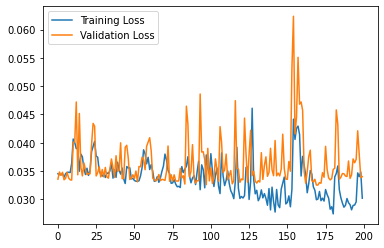

In [161]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [162]:
encoded_imgs = autoencoder.encoder(test_data).numpy()
# noral_test_data를 encoder에 입력 : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

ValueError: operands could not be broadcast together with shapes (140,) (1000,) 

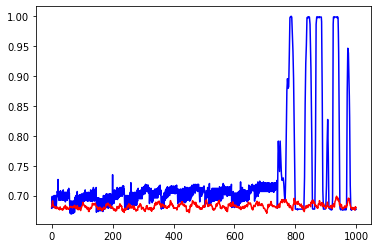

In [163]:
plt.plot(test_data[0], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[0], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(140), decoded_imgs[0], test_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()